In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from data_loader import data_loader_noH

In [2]:
data = np.load('Data/X_red3.npy')
data = data[:,[0,1,2,3,5,6]]

In [3]:
data_red = data[:500,:]

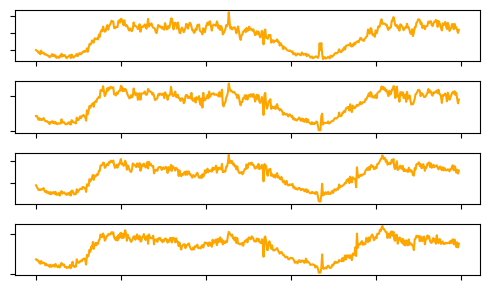

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(5, 3))
for i in range(4):
    axs[i].plot(100*data_red[:-1, i], c="orange")
    #axs[i].plot(100*z[1:,i], "-", label = 'Original')
    #axs[i].legend()
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    # for val in np.arange(0,500,50):
    #     axs[i].axvline(x=val, color='blue', linestyle='--')
plt.tight_layout()
fig.savefig("Figures/delay_embedding_2.png", dpi = 300)

In [5]:
x_train, dx_train, x_val, dx_val = data_loader_noH()

In [6]:
dx_train_sub = dx_train[:500,:]

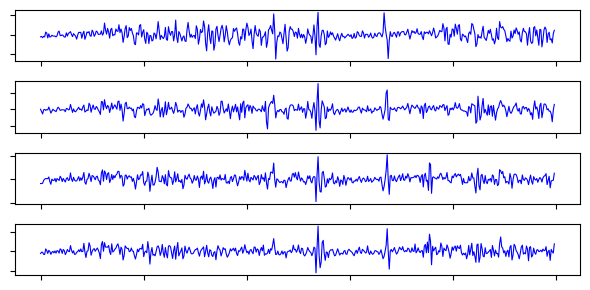

In [7]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(6, 3))
for i in range(4):
    axs[i].plot(100*dx_train_sub[:-1, i], lw = 0.8, c="blue")
    #axs[i].plot(100*z[1:,i], "-", label = 'Original')
    #axs[i].legend()
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
    # for val in np.arange(0,500,50):
    #     axs[i].axvline(x=val, color='blue', linestyle='--')
plt.tight_layout()
fig.savefig("Figures/derivative_show.png", dpi = 300)

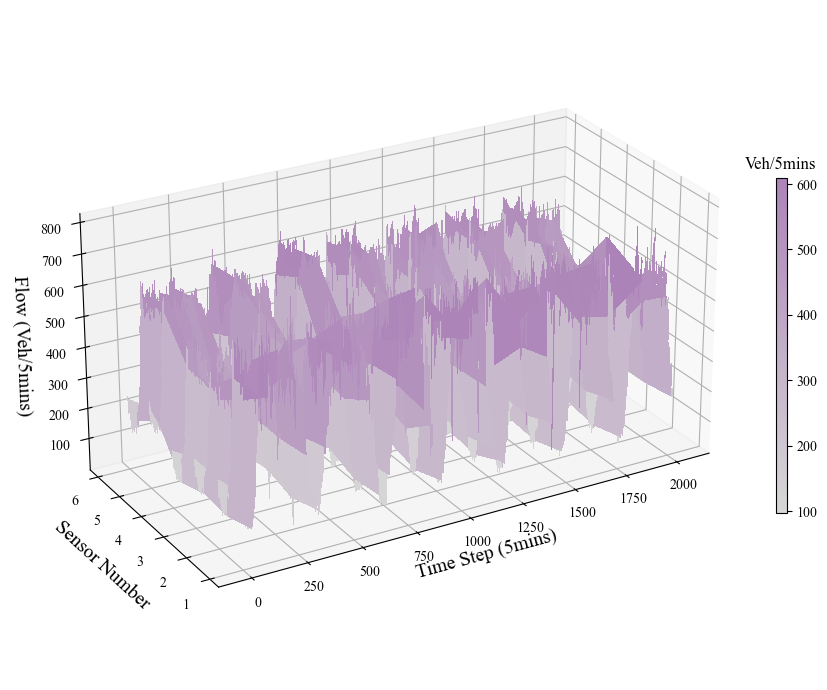

In [8]:
plt.rcParams['font.family'] = 'Times New Roman'
fig = plt.figure(figsize=(10, 7))
ax = plt. axes(projection = '3d')
x = np.arange(data.shape[0])
y = np.arange(data.shape[1])+1
X, Y = np.meshgrid(x, y)
cmap = plt.cm.colors.LinearSegmentedColormap.from_list('custom_cmap', ['#d7d7d7', '#ac83b8'])
surf = ax.plot_surface(X, Y, data.T,cmap=cmap,linewidth=0, antialiased=False)
ax.set_box_aspect([1, 0.5, 0.5])
ax.view_init(elev=25, azim=240)
ax.set_xlabel('Time Step (5mins)', fontsize = 14)
ax.set_ylabel('Sensor Number', fontsize = 14)
ax.set_zlabel('Flow (Veh/5mins)', fontsize = 14)
clb = fig.colorbar(surf, shrink=0.5, aspect=30)
clb.ax.set_title("Veh/5mins", fontsize = 12)
plt.tight_layout()
plt.show()
fig.savefig("Figures/raw_data.png", dpi = 300)

In [9]:
DMDOri_predicted = np.load('Pred_Results/one_step_pred_DMDOri.npy')
DMDOri_true = np.load('Pred_Results/x_val_DMDOri.npy')

sindy_predicted = np.load('Pred_Results/one_step_pred_sindy.npy')
sindy_true = np.load('Pred_Results/x_val_sindy.npy')

DMD_predicted = np.load('Pred_Results/one_step_pred_DMD.npy')
DMD_true = np.load('Pred_Results/x_val_DMD.npy')

proposed_predicted = np.load('Pred_Results/one_step_pred_proposed.npy')
proposed_true = np.load('Pred_Results/z.npy')

proposed_predicted_2 = np.load('Pred_Results/two_step_pred_proposed.npy')
#proposed_true = np.load('Pred_Results/z.npy')

proposed_predicted_3 = np.load('Pred_Results/three_step_pred_proposed.npy')

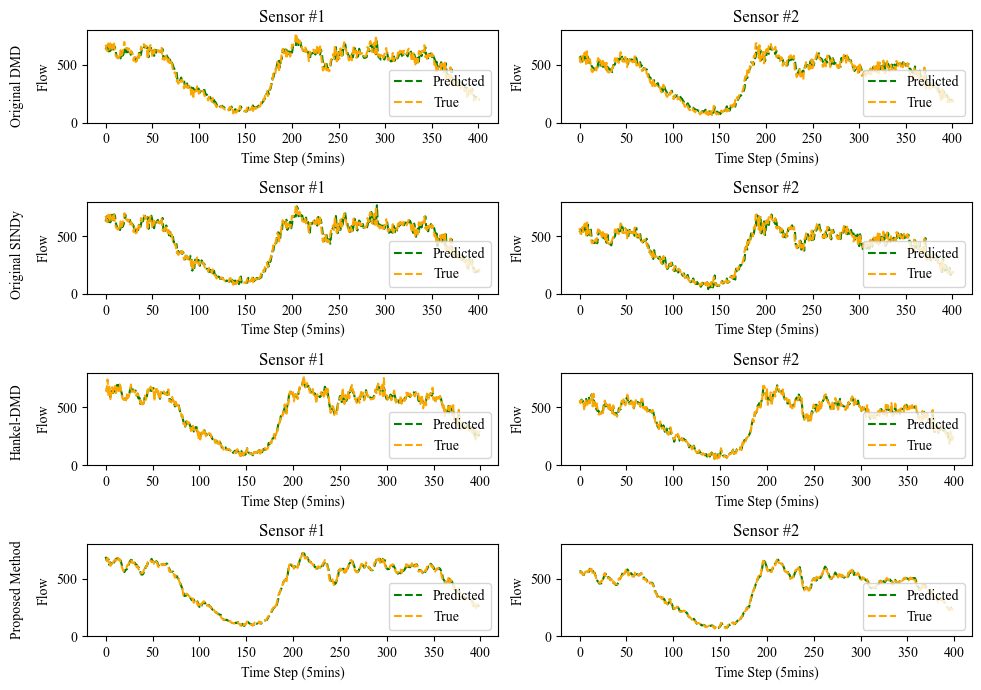

In [10]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 7))

# Plot each column in a separate subplot


for col in range(2):
    axs[0, col].plot(100*DMDOri_predicted[:-1, col], "--", color='green',label= "Predicted")
    axs[0, col].plot(100*DMDOri_true[1:,col], "--", color='orange', label = 'True')
    axs[0, col].set_ylim([0, 800])
    axs[0, col].set_title(f'Sensor #{(col)+1}')
    axs[0, col].set_xlabel('Time Step (5mins)')
    axs[0, col].set_ylabel('Flow')
    axs[0, col].legend(loc='lower right', fontsize='medium')

for col in range(2):
    axs[1, col].plot(100*sindy_predicted[:-1, col],"--", color='green', label= "Predicted")
    axs[1, col].plot(100*sindy_true[1:,col], "--", color='orange', label = 'True')
    axs[1, col].set_ylim([0, 800])
    axs[1, col].set_title(f'Sensor #{(col)+1}')
    axs[1, col].set_xlabel('Time Step (5mins)')
    axs[1, col].set_ylabel('Flow')
    axs[1, col].legend(loc='lower right', fontsize='medium')

for col in range(2):
    axs[2, col].plot(100*DMD_predicted[:-1, col], "--", color = 'green', label= "Predicted")
    axs[2, col].plot(100*DMD_true[1:,col], "--", color = 'orange', label = 'True')
    axs[2, col].set_ylim([0, 800])
    axs[2, col].set_title(f'Sensor #{(col)+1}')
    axs[2, col].set_xlabel('Time Step (5mins)')
    axs[2, col].set_ylabel('Flow')
    axs[2, col].legend(loc='lower right', fontsize='medium')

for col in range(2):
    axs[3, col].plot(100*proposed_predicted[:-1, col], "--", color = 'green', label= "Predicted")
    axs[3, col].plot(100*proposed_true[1:,col], "--", color = 'orange', label = 'True')
    axs[3, col].set_ylim([0, 800])
    axs[3, col].set_title(f'Sensor #{(col)+1}')
    axs[3, col].set_xlabel('Time Step (5mins)')
    axs[3, col].set_ylabel('Flow')
    axs[3, col].legend(loc='lower right', fontsize='medium')
fig.text(0.03, 0.15, 'Proposed Method', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.39, 'Hankel-DMD', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.63, 'Original SINDy', ha='center', va='center', rotation='vertical')
fig.text(0.03, 0.87, 'Original DMD', ha='center', va='center', rotation='vertical')
# Show the figure
plt.tight_layout()
plt.rcParams['font.family'] = 'Times New Roman'
plt.subplots_adjust(left=0.1)
plt.show()
fig.savefig("Figures/Prediction_Plots_Method.png",dpi=300)

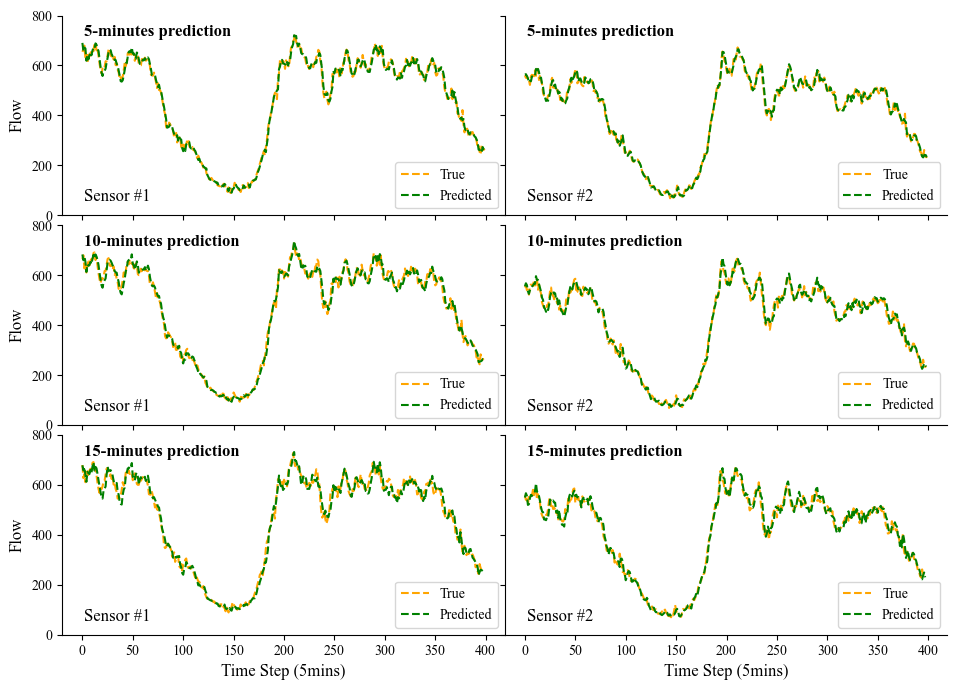

In [47]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 7),sharex=True, sharey=True)

# Plot each column in a separate subplot

for col in range(2):
    axs[0, col].plot(100*proposed_true[1:,col], "--", color = 'orange', label = 'True')
    axs[0, col].plot(100*proposed_predicted[:-1, col], "--", color = 'green', label= "Predicted")
    axs[0, col].set_ylim([0, 800])
    #axs[0, col].set_title(f'Sensor #{(col)+1}')
    #axs[0, col].set_xlabel('Time Step (5mins)')
    #axs[0, col].set_ylabel('Flow')
    axs[0, col].legend(loc='lower right', fontsize='medium')
    axs[0, col].text(0.05, 0.05, f'Sensor #{(col)+1}', transform=axs[0, col].transAxes, va='bottom', ha='left', fontsize = 12)
    axs[0, col].text(0.05, 0.95, '5-minutes prediction', transform=axs[0, col].transAxes, va='top', ha='left', fontsize = 12, weight='bold')
    axs[0, col].spines['top'].set_visible(False)
    axs[0, col].spines['right'].set_visible(False)



for col in range(2):
    axs[1, col].plot(100*proposed_true[2:,col], "--", color = 'orange', label = 'True')
    axs[1, col].plot(100*proposed_predicted_2[:-2, col], "--", color = 'green', label= "Predicted")
    axs[1, col].set_ylim([0, 800])
    #axs[1, col].set_title(f'Sensor #{(col)+1}')
    #axs[1, col].set_xlabel('Time Step (5mins)')
    #axs[1, col].set_ylabel('Flow')
    axs[1, col].legend(loc='lower right', fontsize='medium')
    axs[1, col].text(0.05, 0.05, f'Sensor #{(col)+1}', transform=axs[1, col].transAxes, va='bottom', ha='left', fontsize = 12)
    axs[1, col].text(0.05, 0.95, '10-minutes prediction', transform=axs[1, col].transAxes, va='top', ha='left', fontsize = 12, weight='bold')
    axs[1, col].spines['top'].set_visible(False)
    axs[1, col].spines['right'].set_visible(False)


for col in range(2):
    axs[2, col].plot(100*proposed_true[3:,col], "--", color = 'orange', label = 'True')
    axs[2, col].plot(100*proposed_predicted_3[:-3, col], "--", color = 'green', label= "Predicted")
    axs[2, col].set_ylim([0, 800])
    #axs[2, col].set_title(f'Sensor #{(col)+1}')
    axs[2, col].set_xlabel('Time Step (5mins)', fontsize = 12)
    #axs[2, col].set_ylabel('Flow')
    axs[2, col].legend(loc='lower right', fontsize='medium')
    axs[2, col].text(0.05, 0.05, f'Sensor #{(col)+1}', transform=axs[2, col].transAxes, va='bottom', ha='left', fontsize = 12)
    axs[2, col].text(0.05, 0.95, '15-minutes prediction', transform=axs[2, col].transAxes, va='top', ha='left', fontsize = 12, weight='bold')
    axs[2, col].spines['top'].set_visible(False)
    axs[2, col].spines['right'].set_visible(False)

for row in range(3):
    axs[row, 0].set_ylabel("Flow", fontsize = 12)
#fig.text(0.03, 0.87, 'Original DMD', ha='center', va='center', rotation='vertical')
# Show the figure
plt.tight_layout()
plt.subplots_adjust(hspace=0.05, wspace=0)
plt.rcParams['font.family'] = 'Times New Roman'
plt.subplots_adjust(left=0.1)
plt.show()
fig.savefig("Figures/Prediction_Plots_Proposed_Method.png",dpi=300)